<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-данных" data-toc-modified-id="1.-Загрузка-данных-1">1. Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#2.-Умножение-матриц" data-toc-modified-id="2.-Умножение-матриц-2">2. Умножение матриц</a></span></li><li><span><a href="#3.-Алгоритм-преобразования" data-toc-modified-id="3.-Алгоритм-преобразования-3">3. Алгоритм преобразования</a></span></li><li><span><a href="#4.-Проверка-алгоритма" data-toc-modified-id="4.-Проверка-алгоритма-4">4. Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#4.1-Исследуем-качество-модели-без-преобразования." data-toc-modified-id="4.1-Исследуем-качество-модели-без-преобразования.-4.1">4.1 Исследуем качество модели без преобразования.</a></span></li><li><span><a href="#4.2-Исследуем-качество-модели-с-преобразованием." data-toc-modified-id="4.2-Исследуем-качество-модели-с-преобразованием.-4.2">4.2 Исследуем качество модели с преобразованием.</a></span></li><li><span><a href="#4.3-Результат-моделей" data-toc-modified-id="4.3-Результат-моделей-4.3">4.3 Результат моделей</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5">Итоговый вывод</a></span></li>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

***
## 1. Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

RND = 2102

In [2]:
pth = './datasets/insurance.csv'

if os.path.exists(pth):
    df = pd.read_csv(pth)
else:
    print('Something is wrong')

In [3]:
def first_check(df):
    print(df.info())
    print(f'Shape: {df.shape}')
    display(df.head())
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    display(df.describe())

In [4]:
first_check(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
Shape: (5000, 5)


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Количество дубликатов: 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


153 дубликата. Так как вариативность данных низка по причине малого количества данных\признаков, то подобное количество дубликатов допустимо. Оставим как есть.

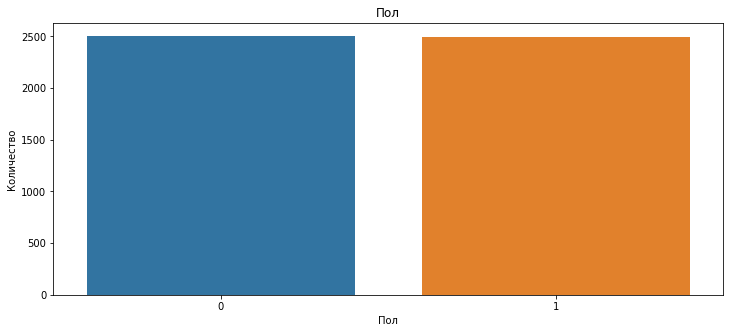

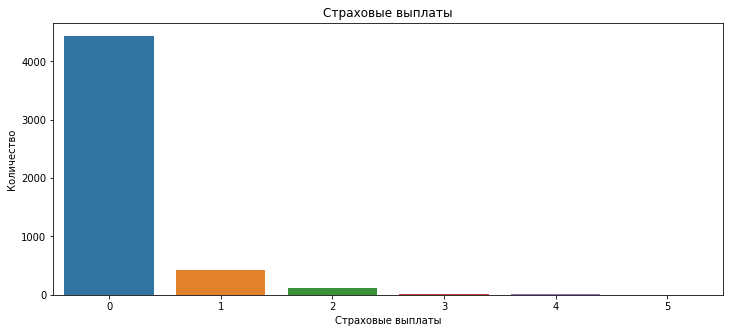

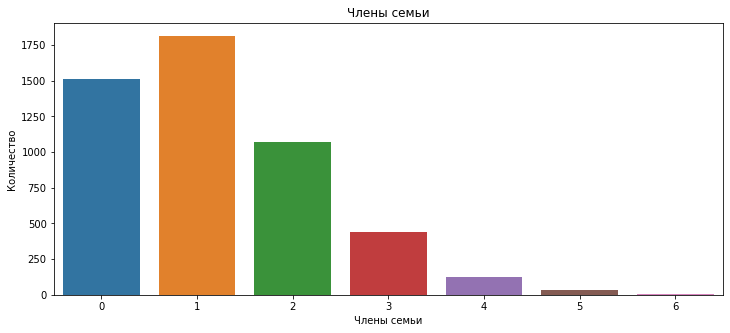

In [5]:
count_spis = ['Пол', 'Страховые выплаты', 'Члены семьи']

for title in count_spis:
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.countplot(x=title, data=df)
    ax.set_title(title)
    plt.ylabel('Количество')
    plt.show()

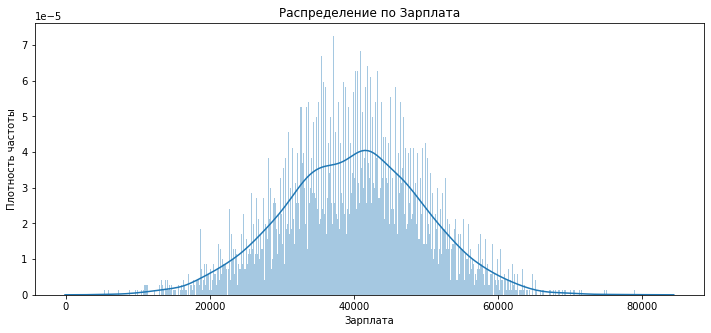

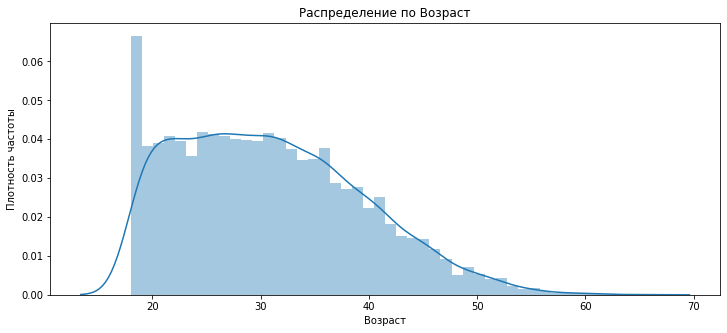

In [6]:
dist_spis = ['Зарплата', 'Возраст']

for title in dist_spis:
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.distplot(df[title], bins=len(df[title].unique()))
    ax.set_title(f'Распределение по {title}')
    plt.ylabel('Плотность частоты');

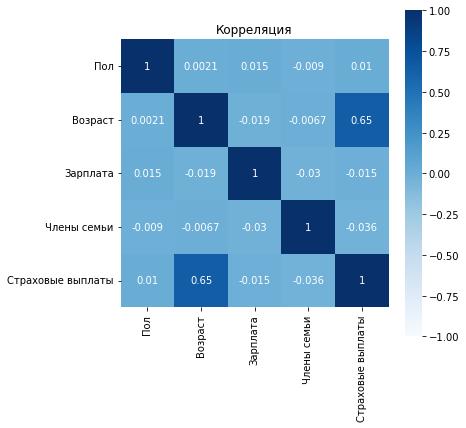

In [7]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, annot=True, square=True, vmin=-1, vmax=1, cmap="Blues")
plt.title('Корреляция')
plt.show()

### Вывод

* `5000` строк и `5` столбцов
* target: `Страховые выплаты`
* features: `Пол`, `Возраст`, `Зарплата`, `Члены семьи`
* Заметная корреляция (по шкале Чеддока) между Возрастом и Страховыми выплатами: `0.65`
* Данные пришли уже в обработанном состоянии

***
## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:**

* **Не изменится**

Заменим матрицу X на Z
$$
Z = XP \qquad (2.1)
$$
где $P$ - строго **обратимая** матрица с некими значениями, на которую может быть умножена матрица $X$

**Обоснование:**

1) Подставим новое значение $Z$ в формулу $w_1$:
$$
(Z^TZ)^{-1} Z^T y \qquad (2.2)
$$

2) Заменим все $Z$ правой частью уравнения 2.1:
$$
((XP)^T XP)^{-1} (XP)^T y \qquad (2.3)
$$

3) Раскроем все произведения $(XP)^T$:
$$
(P^T X^T XP)^{-1} P^T X^T y \qquad (2.4)
$$

4) Сгруппируем множители в скобках $(P^T X^T XP)^{-1}$:
$$
(P^T (X^T X) P)^{-1} P^T X^T y \qquad (2.5)
$$

5) Раскроем скобки $(P^T (X^T X) P)^{-1}$:
$$
P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \qquad (2.6)
$$

6) Так как $P$ - строго **обратимая** (из условия, прописывал в Ответе на вопрос) матрица, то $(P^T)^{-1} P^T = E$ :
$$
P^{-1} (X^T X)^{-1} EX^T = P^{-1} (X^T X)^{-1} X^T \qquad (2.7)
$$

7) Исходя из условия $w = (X^T X)^{-1} X^T y$, следовательно
$$
w_1 = P^{-1} (X^T X)^{-1} X^T = P^{-1}w \qquad (2.8)
$$

***
Предсказания модели расчитываются по формуле:
$$
a = Xw
$$

Подставим в эту ф-лу значения $Z$ и $w_1$:
$$
a_1 = Zw_1 = XP P^{-1}w
$$

Так как $P$ - строго **обратимая** (из условия, прописывал в Ответе на вопрос) матрица, то:
$$
a_1 = XP P^{-1}w = XEw = Xw
$$

Мы доказали, что предсказания $a_1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, отвечая на вопрос *изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу* - **нет, не изменится**. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w_1$ связаны следующим образом:
$$
w_1 = P^{-1}w
$$

***
## 3. Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу (nxn, где n - число столбцов в матрице признаков) , которая будет генерироваться случайным образом.

Этапы алгоритма:
1) Составление матрицы $Y$.

2) Проверка матрицы на обратимость. Вычисление детерминанта матрицы $\det{Y}$.

3) Получение матрицы преобразованных признаков $Z = XY$.

4) Применение алгоритма на преобразованных признаках $Z$.

**Обоснование**

Матрица $Y$ должна иметь необходимую размерность nxn , где n - количество признаков для регрессии. Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$.

Обратная матрица $Y$ существует только для квадратных невырожденных матриц (определитель которых **не равен** нулю).

Проверка:

In [8]:
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
n = len(X[0])
det_y = 0

while det_y == 0:
    np.random.seed(RND)
    Y = np.random.randn(n, n)
    det_y = np.linalg.det(Y)

det_y = np.linalg.det(Y)
print(f'Матрица X:\n {X} \n')
print(f'Матрица Y:\n {Y} \n')
print(f'Определитель матрицы Y: {det_y}')

Матрица X:
 [[1 2]
 [3 4]
 [5 6]] 

Матрица Y:
 [[ 1.21924816 -1.42770921]
 [ 1.51882467  0.85776432]] 

Определитель матрицы Y: 3.2142675383380674


Мы убедились, что $Y$- орбратная матрица.

Найдем значние $Z$:

In [9]:
Z = (X @ Y)
print(f'Матрица Z:\n {Z} \n')

Матрица Z:
 [[ 4.2568975   0.28781944]
 [ 9.73304317 -0.85207033]
 [15.20918883 -1.9919601 ]] 



После этого добавляем нулевой столбец и вводим данные в линейную регрессию.

***
## 4. Проверка алгоритма

In [10]:
def default_LR(features_train, features_test, target_train, target_test):    
    """ С исходными признаками """
    model = LinearRegression()
    model.fit(features_train, target_train)
    pred = model.predict(features_test)

    R2_LR = r2_score(target_test, pred)
    print(f'Коэфициенты:{model.coef_}')
    print(f'R2 скор: {R2_LR}')
    return R2_LR

In [11]:
def scaled_LR(features_train, features_test, target_train, target_test):
    """ С отмасштабированными признаками """
    new_pipeline = make_pipeline(StandardScaler(), LinearRegression(), verbose=True)
    new_pipeline.fit(features_train, target_train)

    R2_LR_data_scaled = r2_score(target_test, new_pipeline.predict(features_test))
    print(f'\nКоэфициенты: {new_pipeline[1].coef_}')
    print(f'R2 скор: {R2_LR_data_scaled}')
    return R2_LR_data_scaled

Поделим признаки на test и train

In [12]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=RND)
n = len(features.columns)

Проверю коэфициенты линейной регрессии. (Сделал это для себя)

In [13]:
X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
y = target_train
w = np.linalg.inv(X.T @ X) @ X.T @ y
display(w[1:])

model = LinearRegression()
model.fit(features_train, target_train)
model.coef_

array([ 1.55258954e-04,  3.54105016e-02, -9.45891944e-08, -1.41921742e-02])

array([ 1.55258954e-04,  3.54105016e-02, -9.45891944e-08, -1.41921742e-02])

### 4.1 Исследуем качество модели без преобразования.

In [14]:
R2_LR_orig_data = default_LR(features_train, features_test, target_train, target_test)

Коэфициенты:[ 1.55258954e-04  3.54105016e-02 -9.45891944e-08 -1.41921742e-02]
R2 скор: 0.43940259280549343


In [15]:
R2_LR_orig_data_scaled = scaled_LR(features_train, features_test, target_train, target_test)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s

Коэфициенты: [ 7.76285065e-05  2.98618853e-01 -9.40882994e-04 -1.54680880e-02]
R2 скор: 0.43940259280549565


### 4.2 Исследуем качество модели с преобразованием.

In [16]:
def crypter_features(features):
    n = len(features.columns)
    det = 0
    
    while det == 0:
        np.random.seed(RND)
        cipher_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
        crypted_features = (features @ cipher_matrix)
        
    return crypted_features, cipher_matrix

In [17]:
display(features.head())
features, cipher_matrix = crypter_features(features)
display(features.head())
print(f'Матрица Y:\n {cipher_matrix}')

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=RND)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


,0,1,2,3
0,148977.0,49937.0,446742.0,149016.0
1,114190.0,38370.0,342374.0,114235.0
2,63116.0,21232.0,189232.0,63145.0
3,125196.0,41872.0,375480.0,125215.0
4,78419.0,26331.0,235132.0,78446.0


Матрица Y:
 [[7 7 8 6]
 [4 8 8 5]
 [3 1 9 3]
 [6 2 6 5]]


In [18]:
R2_LR_cipher_data = default_LR(features_train, features_test, target_train, target_test)

Коэфициенты:[-1.56593995e-02  3.06383518e-03 -4.95671729e-05  1.47867911e-02]
R2 скор: 0.4394025928055142


In [19]:
R2_LR_cipher_data_scaled = scaled_LR(features_train, features_test, target_train, target_test)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s

Коэфициенты: [-467.27966848   30.47201031   -4.43733843  441.23862386]
R2 скор: 0.4394025928054982


### 4.3 Результат моделей

In [20]:
R2_list = [
    R2_LR_orig_data,
    R2_LR_orig_data_scaled,
    R2_LR_cipher_data,
    R2_LR_cipher_data_scaled,
]

names_R2_list =[
    'Линейная регрессия',
    'Линейная регрессия c масштабом',
    'Линейная регрессия на преобразованных признаках',
    'Линейная регрессия на преобразованных признаках c масштабом',
]

result = pd.DataFrame(
    data=R2_list, 
    columns=['R2_score'], 
    index=names_R2_list,
)

display(result)

,R2_score
Линейная регрессия,0.439403
Линейная регрессия c масштабом,0.439403
Линейная регрессия на преобразованных признаках,0.439403
Линейная регрессия на преобразованных признаках c масштабом,0.439403


Колебания 14 знака и дальше после запятой связаны с точностью хранения дробных чисел в python 3.

***
## Итоговый вывод
В ходе работы было проделано:

* Загружены и изучены данные.
* Качество линейной регресии **не изменилось** от использования исходной матрицы, умноженную на **строго обратимую**.
* Создан алгоритм преобразования данных.
* Исследован алгоритм преобразования данных и проверена метрика `R2` для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что имея правильную матрицу, данные очень просто зашифровать от распознования.